In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/content/drive/MyDrive/IDS561

/content/drive/MyDrive/content/drive/MyDrive/IDS561


In [ ]:
#Complete the installation process
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
!ls

!tar -xvf spark-3.5.1-bin-hadoop3.tgz
!ls

Assignment3		final_experiment.csv	 spark-3.5.1-bin-hadoop3.tgz
daily_active_users.csv	iris.data		 spark-3.5.1-bin-hadoop3.tgz.3
experiment.txt		spark-3.4.2-bin-hadoop3
experiment_user.csv	spark-3.5.1-bin-hadoop3
spark-3.5.1-bin-hadoop3/
spark-3.5.1-bin-hadoop3/sbin/
spark-3.5.1-bin-hadoop3/sbin/spark-config.sh
spark-3.5.1-bin-hadoop3/sbin/stop-slave.sh
spark-3.5.1-bin-hadoop3/sbin/stop-mesos-dispatcher.sh
spark-3.5.1-bin-hadoop3/sbin/start-workers.sh
spark-3.5.1-bin-hadoop3/sbin/start-slaves.sh
spark-3.5.1-bin-hadoop3/sbin/start-all.sh
spark-3.5.1-bin-hadoop3/sbin/stop-all.sh
spark-3.5.1-bin-hadoop3/sbin/workers.sh
spark-3.5.1-bin-hadoop3/sbin/start-mesos-dispatcher.sh
spark-3.5.1-bin-hadoop3/sbin/spark-daemon.sh
spark-3.5.1-bin-hadoop3/sbin/decommission-worker.sh
spark-3.5.1-bin-hadoop3/sbin/slaves.sh
spark-3.5.1-bin-hadoop3/sbin/stop-mesos-shuffle-service.sh
spark-3.5.1-bin-hadoop3/sbin/stop-history-server.sh
spark-3.5.1-bin-hadoop3/sbin/stop-worker.sh
spark-3.5.1-bin-hadoop3/sbin/de

In [ ]:
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/drive/MyDrive/content/drive/MyDrive/IDS561/spark-3.5.1-bin-hadoop3"

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
df = spark.read.options(delimeter=',', inferSchema=True, header=True).csv('/content/drive/MyDrive/content/drive/MyDrive/IDS561/train.csv')

In [ ]:
df.limit(3).toPandas().style.hide(axis="index")

Store,Dept,Date,Weekly_Sales,IsHoliday
1,1,2010-02-05,24924.500000,False
1,1,2010-02-12,46039.490000,True
1,1,2010-02-19,41595.550000,False


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import pyspark.sql.functions as f
import pyspark

In [ ]:
mn_dt = df.select('Date').agg(f.min('Date')).collect()[0][0]
mx_dt = df.select('Date').agg(f.max('Date')).collect()[0][0]
print('Total Rows: ',df.count())
print('Min Date: ', mn_dt)
print('Max Date: ', mx_dt)

Total Rows:  421570
Min Date:  2010-02-05
Max Date:  2012-10-26


In [ ]:
stores = spark.read.options(delimeter=',', inferSchema=True, header=True).csv('/content/drive/MyDrive/content/drive/MyDrive/IDS561/stores.csv')
stores.limit(3).toPandas().style.hide(axis="index")

Store,Type,Size
1,A,151315
2,A,202307
3,B,37392


In [ ]:
print('Total Rows: ', stores.count())
print('Total Stores: ', stores.select('Store').distinct().count())
stores.select('Type').distinct().show()

Total Rows:  45
Total Stores:  45
+----+
|Type|
+----+
|   B|
|   C|
|   A|
+----+



In [ ]:
features = spark.read.options(delimeter=',', inferSchema=True, header=True).csv('/content/drive/MyDrive/content/drive/MyDrive/IDS561/features.csv')
features.limit(3).toPandas().style.hide(axis="index")

Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
1,2010-02-05,42.310000,2.572000,NA,NA,NA,NA,NA,211.0963582,8.106,False
1,2010-02-12,38.510000,2.548000,NA,NA,NA,NA,NA,211.2421698,8.106,True
1,2010-02-19,39.930000,2.514000,NA,NA,NA,NA,NA,211.2891429,8.106,False


In [ ]:
mn_dt = features.select('Date').agg(f.min('Date')).collect()[0][0]
mx_dt = features.select('Date').agg(f.max('Date')).collect()[0][0]
print('Total Rows: ',features.count())
print('Min Date: ', mn_dt)
print('Max Date: ', mx_dt)

Total Rows:  8190
Min Date:  2010-02-05
Max Date:  2013-07-26


In [ ]:
# Converting 'NA' strings in MarkDown columns to null values
for i in range(1,6):
    features = features.withColumn(
        f'MarkDown{i}', f.when(f.col(f'MarkDown{i}')=='NA', None).otherwise(
            f.col(f'MarkDown{i}')).cast('float'))

In [ ]:
pdf = df.join(
    stores, on='Store', how='inner').join(
    features.drop('IsHoliday'), on=['Date','Store'], how='left').toPandas()
pdf['Date'] = pd.to_datetime(pdf['Date'])
pdf.set_index('Date', inplace=True)
pdf["CPI"] = pd.to_numeric(pdf["CPI"], downcast="float")
pdf["Unemployment"] = pd.to_numeric(pdf["Unemployment"], downcast="float")
pdf.head()

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Date,,,,,,,,,,,,,,,
2010-02-05,1,1,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096359,8.106
2010-02-12,1,1,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242172,8.106
2010-02-19,1,1,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289139,8.106
2010-02-26,1,1,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319641,8.106
2010-03-05,1,1,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [ ]:
pdf.dtypes


Store             int32
Dept              int32
Weekly_Sales    float64
IsHoliday          bool
Type             object
Size              int32
Temperature     float64
Fuel_Price      float64
MarkDown1       float32
MarkDown2       float32
MarkDown3       float32
MarkDown4       float32
MarkDown5       float32
CPI             float32
Unemployment    float32
dtype: object

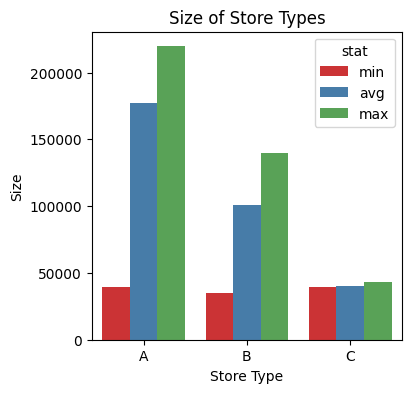

In [ ]:
# Checking min, max, average of store by Type
stdf = stores.groupBy('Type').agg(
    f.min('Size').alias('min'),
    f.round(f.avg('Size'),2).alias('avg'),
    f.max('Size').alias('max')).orderBy('Type').toPandas()

m_df = pd.melt(stdf, id_vars="Type", var_name="stat", value_name="Size")
fig, ax = plt.subplots(figsize=(4,4))
sns.barplot(x='Type', y='Size', hue='stat', data=m_df, ax=ax, palette='Set1').set_title('Size of Store Types')
plt.xlabel('Store Type')
plt.show()

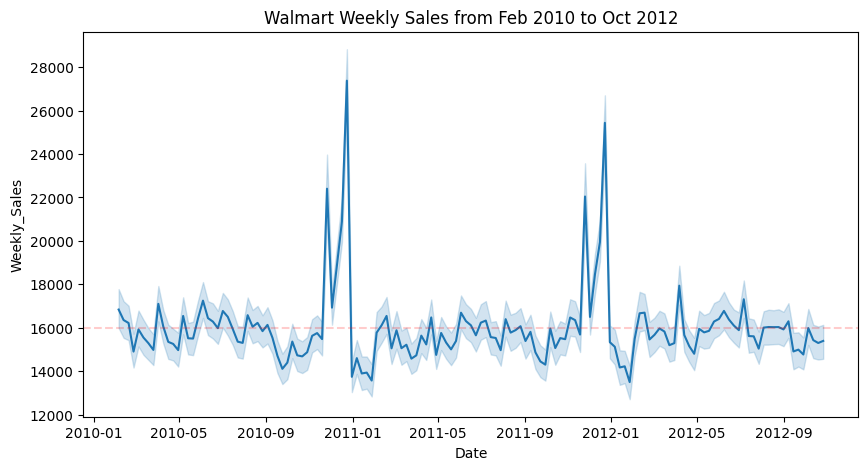

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=pdf,
             x='Date',
             y='Weekly_Sales',
            ).set_title('Walmart Weekly Sales from Feb 2010 to Oct 2012')
plt.axhline(pdf['Weekly_Sales'].mean(), color='r', alpha=0.2, linestyle='--')
plt.show()

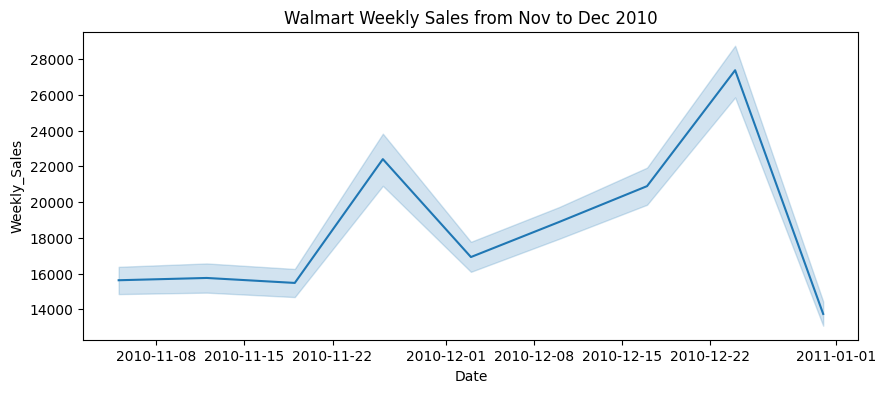

In [ ]:
plt.figure(figsize=(10,4))
sns.lineplot(
    data=pdf.loc[(pdf.index >'2010-11-01') & (pdf.index<'2011-01-01')],
    x='Date', y='Weekly_Sales'
    ).set_title('Walmart Weekly Sales from Nov to Dec 2010')
plt.show()

In [ ]:
pdf['Day'] = pdf.index.day
pdf['Month'] = pdf.index.month
pdf['Quarter'] = pdf.index.quarter
pdf['Year'] = pdf.index.year

<ipython-input-27-51dec4516721>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=pdf.loc[(pdf.index >'2011-01-01') & (pdf.index<'2011-12-31')], x='Month', y='Weekly_Sales',


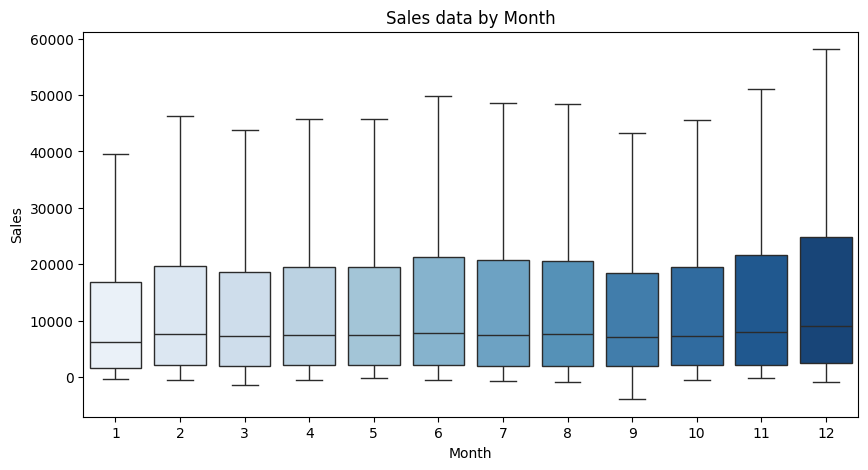

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=pdf.loc[(pdf.index >'2011-01-01') & (pdf.index<'2011-12-31')], x='Month', y='Weekly_Sales',
            palette='Blues', showfliers=False
           ).set_title('Sales data by Month')
plt.ylabel('Sales')
plt.show()

<ipython-input-28-52ce5d04cfc5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=pdf.loc[(pdf.index >'2011-01-01') & (pdf.index<'2011-12-31')], x='Quarter', y='Weekly_Sales',


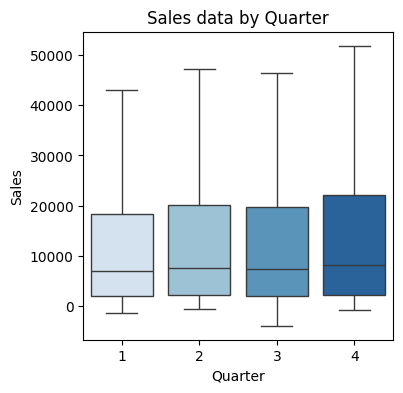

In [ ]:
plt.figure(figsize=(4,4))
sns.boxplot(data=pdf.loc[(pdf.index >'2011-01-01') & (pdf.index<'2011-12-31')], x='Quarter', y='Weekly_Sales',
            palette='Blues', showfliers=False
           ).set_title('Sales data by Quarter')
plt.ylabel('Sales')
plt.show()

<ipython-input-29-3e6635473dc7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=pdf, x='Year', y='Weekly_Sales',


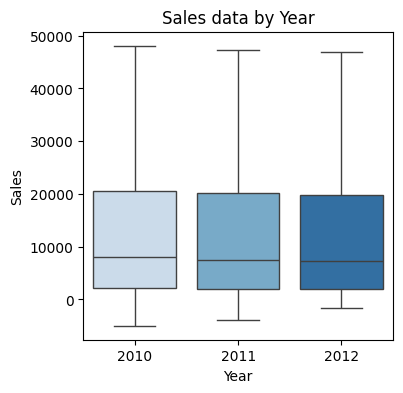

In [ ]:
plt.figure(figsize=(4,4))
sns.boxplot(data=pdf, x='Year', y='Weekly_Sales',
            palette='Blues', showfliers=False
           ).set_title('Sales data by Year')
plt.ylabel('Sales')
plt.show()

<ipython-input-30-f8b0aa8dffee>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=pdf.loc[pdf.index.month.isin([2,3,4,5,6,7,8,9,10])], x='Year', y='Weekly_Sales',


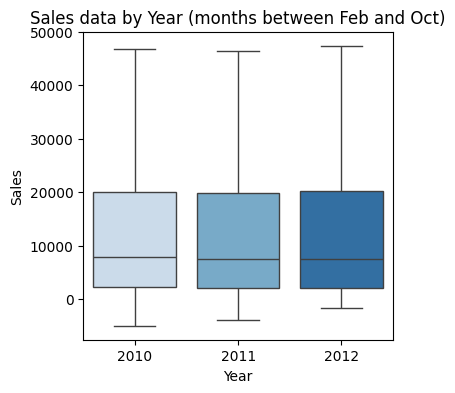

In [ ]:
plt.figure(figsize=(4,4))
sns.boxplot(data=pdf.loc[pdf.index.month.isin([2,3,4,5,6,7,8,9,10])], x='Year', y='Weekly_Sales',
            palette='Blues', showfliers=False
           ).set_title('Sales data by Year (months between Feb and Oct)')
plt.ylabel('Sales')
plt.show()

<ipython-input-31-fb602c8b9990>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pdf, x='IsHoliday', y='Weekly_Sales',


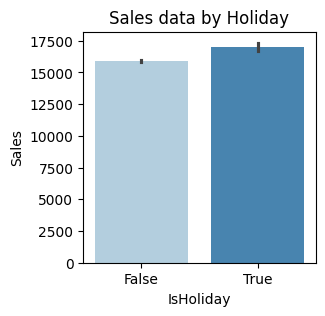

In [ ]:
plt.figure(figsize=(3,3))
sns.barplot(data=pdf, x='IsHoliday', y='Weekly_Sales',
            palette='Blues', #showfliers=False
           ).set_title('Sales data by Holiday')
plt.ylabel('Sales')
plt.show()

<ipython-input-32-b29283bce2fe>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=pdf, x='Type', y='Weekly_Sales',


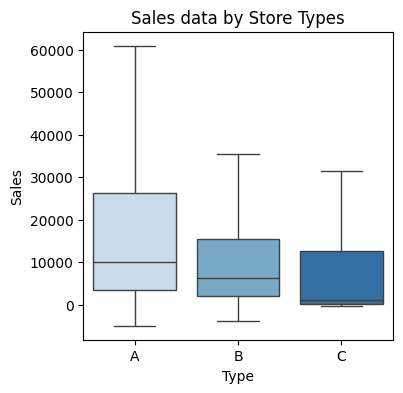

In [ ]:
plt.figure(figsize=(4,4))
sns.boxplot(data=pdf, x='Type', y='Weekly_Sales',
            palette='Blues' , showfliers=False
           ).set_title('Sales data by Store Types')
plt.ylabel('Sales')
plt.show()

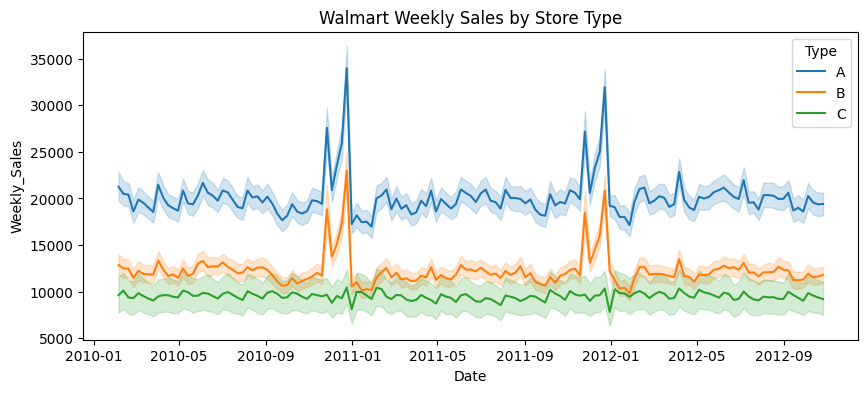

In [ ]:
plt.figure(figsize=(10,4))
sns.lineplot(data=pdf,
             x='Date',
             y='Weekly_Sales',
             hue='Type'
            ).set_title('Walmart Weekly Sales by Store Type')
plt.show()

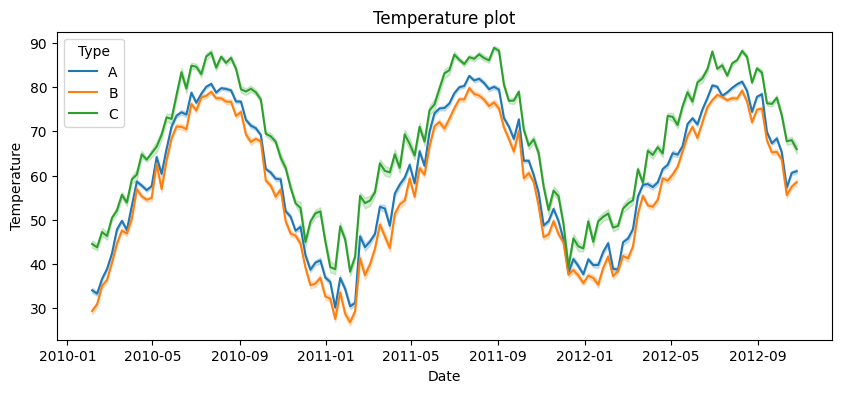

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
sns.lineplot(data=pdf,
             x='Date',
             y='Temperature',
             hue='Type',
             ax=ax,
            ).set_title('Temperature plot')
plt.show()

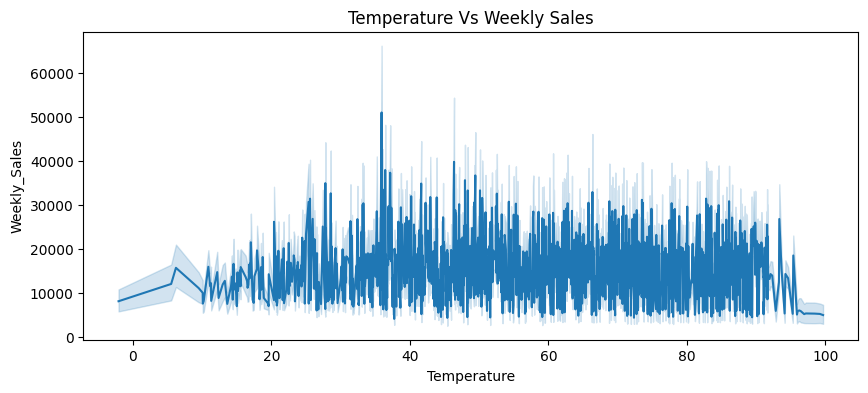

In [ ]:
plt.figure(figsize=(10,4))
sns.lineplot(data=pdf.loc[(pdf.index >'2011-01-01') & (pdf.index<'2011-12-31')],
             x='Temperature',
             y='Weekly_Sales',
            ).set_title('Temperature Vs Weekly Sales')
plt.show()

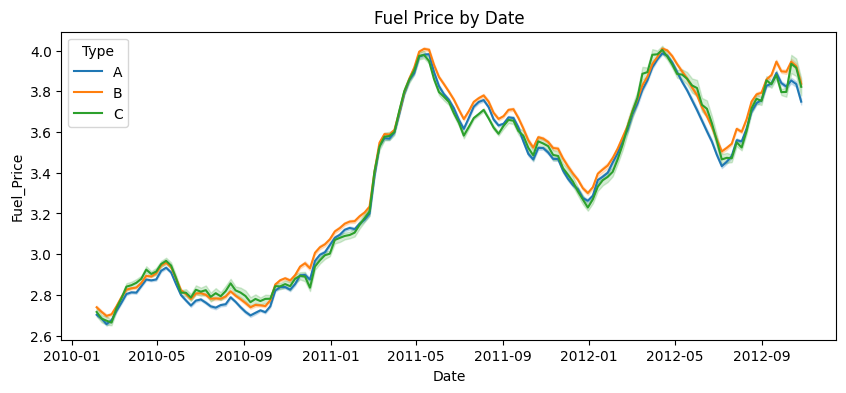

In [ ]:
plt.figure(figsize=(10,4))
sns.lineplot(data=pdf,
             x='Date',
             y='Fuel_Price',
             hue='Type',
            ).set_title('Fuel Price by Date')
plt.show()

In [ ]:
pdf['Fuel_Price_Change'] = pdf['Fuel_Price'].rolling(window=2).apply(lambda x: x.iloc[1] - x.iloc[0]).fillna(0)

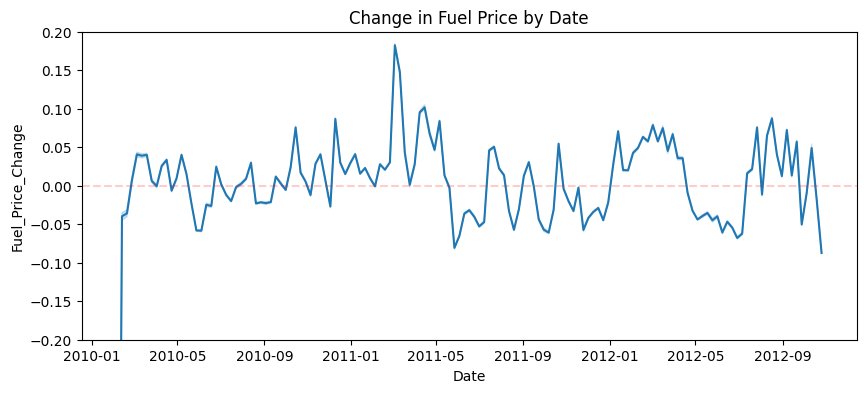

In [ ]:
plt.figure(figsize=(10,4))
sns.lineplot(data=pdf,
             x='Date',
             y='Fuel_Price_Change',
             #hue='Type',
            ).set_title('Change in Fuel Price by Date')
plt.axhline(pdf['Fuel_Price_Change'].mean(), color='r', alpha=0.2, linestyle='--')
plt.ylim(-0.2, 0.2)
plt.show()

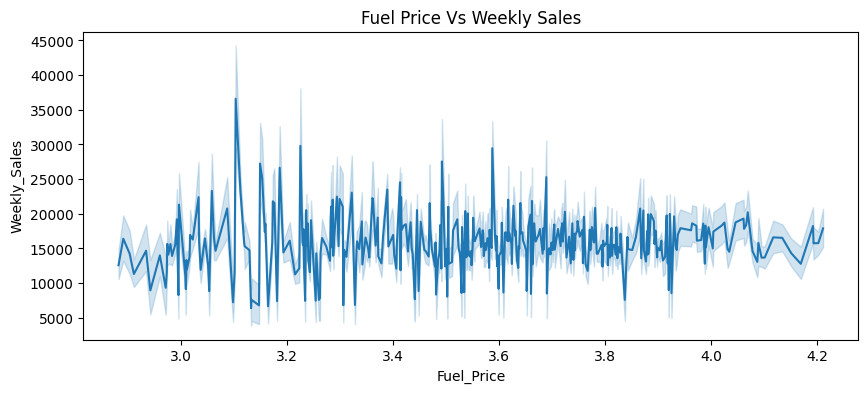

In [ ]:
plt.figure(figsize=(10,4))
sns.lineplot(data=pdf.loc[(pdf.index >'2011-01-01') & (pdf.index<'2011-12-31')],
             x='Fuel_Price',
             y='Weekly_Sales',
            ).set_title('Fuel Price Vs Weekly Sales')
plt.show()

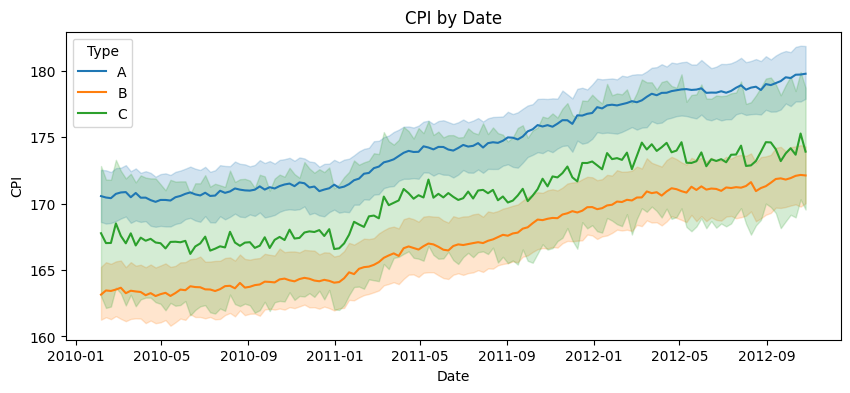

In [ ]:
plt.figure(figsize=(10,4))
sns.lineplot(data=pdf,
             x='Date',
             y='CPI',
             hue='Type'
            ).set_title('CPI by Date')
plt.show()

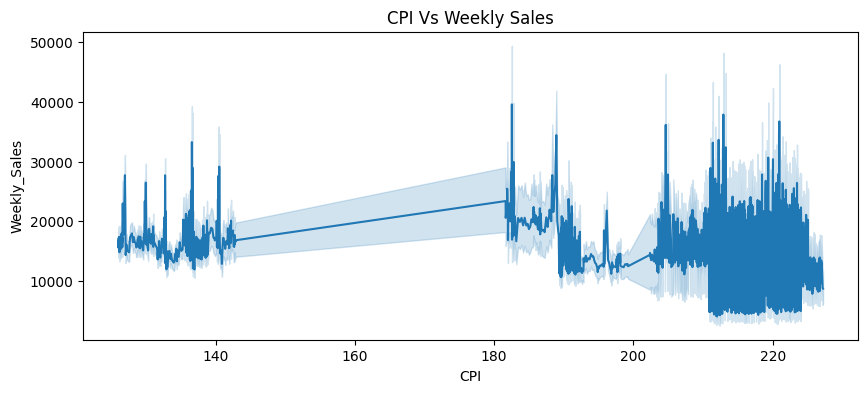

In [ ]:
plt.figure(figsize=(10,4))
sns.lineplot(data=pdf,
             x='CPI',
             y='Weekly_Sales',
            ).set_title('CPI Vs Weekly Sales')
plt.show()

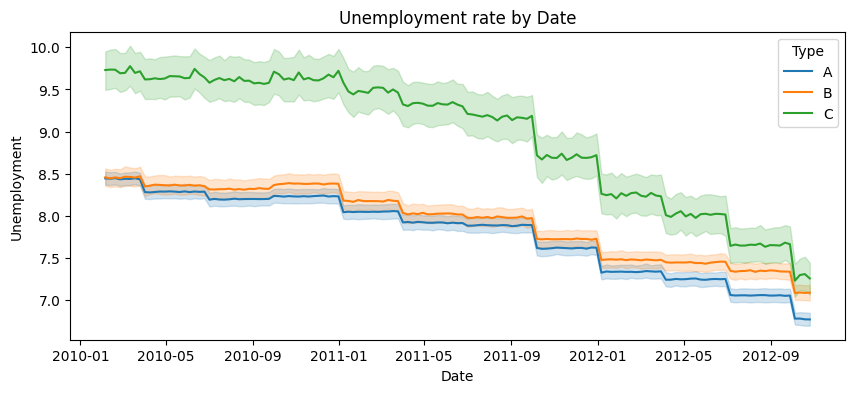

In [ ]:
plt.figure(figsize=(10,4))
sns.lineplot(data=pdf,
             x='Date',
             y='Unemployment',
             hue='Type',
            ).set_title('Unemployment rate by Date')
plt.show()

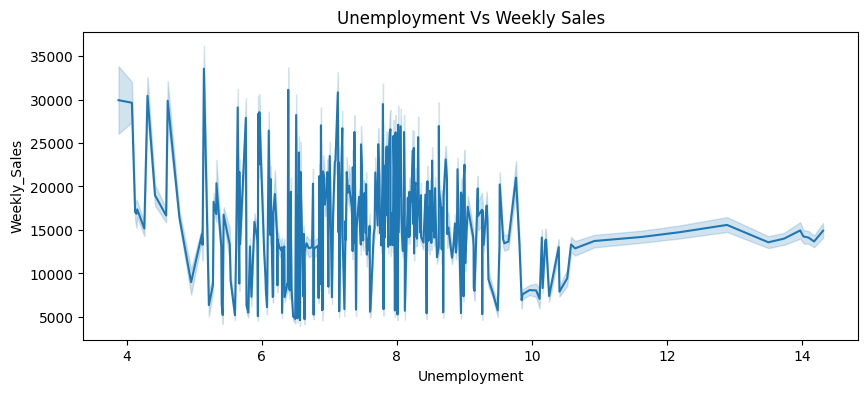

In [ ]:
plt.figure(figsize=(10,4))
sns.lineplot(data=pdf,
             x='Unemployment',
             y='Weekly_Sales',
            ).set_title('Unemployment Vs Weekly Sales')
plt.show()

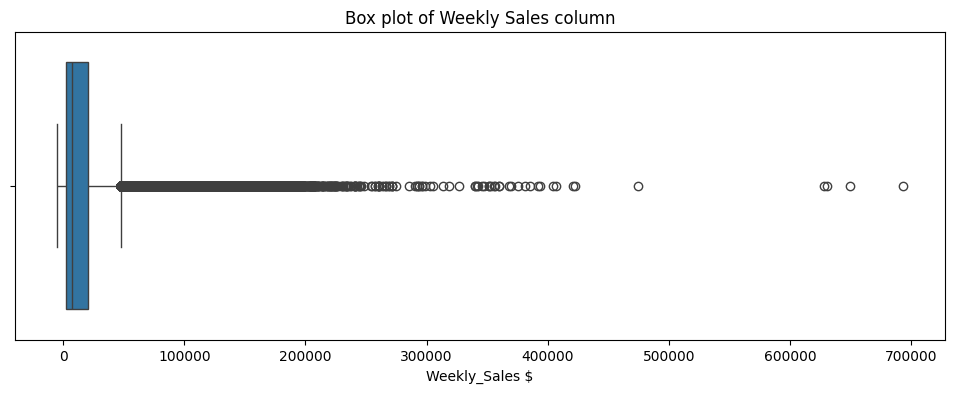

In [ ]:
plt.figure(figsize=(12,4))
sns.boxplot(pdf['Weekly_Sales'], orient='h')
plt.xlabel('Weekly_Sales $')
plt.title('Box plot of Weekly Sales column')
plt.show()

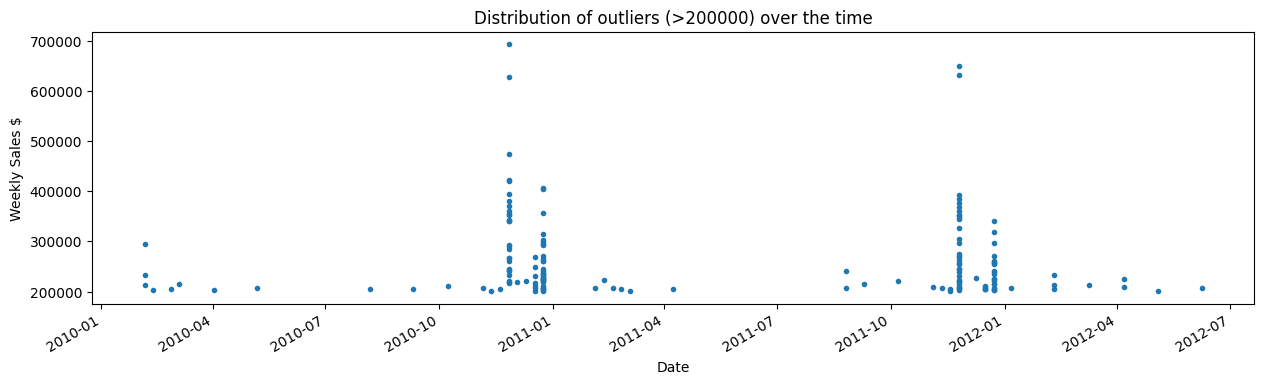

In [ ]:
pdf.query('Weekly_Sales > 200000')['Weekly_Sales'].plot(figsize=(15,4), style='.')
plt.ylabel('Weekly Sales $')
plt.title('Distribution of outliers (>200000) over the time')
plt.show()

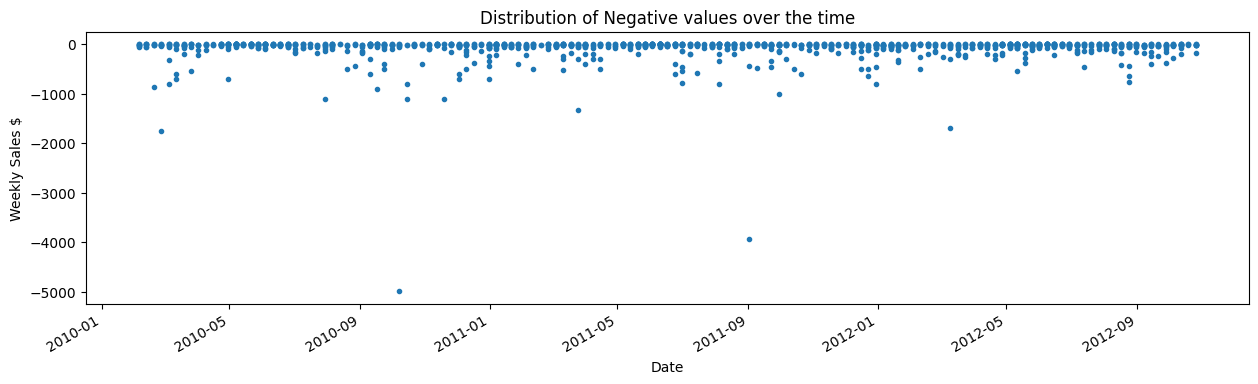

In [ ]:
pdf.query('Weekly_Sales < 0')['Weekly_Sales'].plot(figsize=(15,4), style='.')
plt.ylabel('Weekly Sales $')
plt.title('Distribution of Negative values over the time')
plt.show()

In [ ]:
old_count = pdf.shape[0]
print('Dataset_size before removing outliers: ', old_count)
pdf = pdf.query('Weekly_Sales >= 0 and Weekly_Sales < 200000')
new_count = pdf.shape[0]
print('Dataset_size after removing outliers: ', pdf.shape[0])
print('Percent decrease in data: ', round((old_count - new_count)*100/old_count,2))

Dataset_size before removing outliers:  421570
Dataset_size after removing outliers:  420122
Percent decrease in data:  0.34


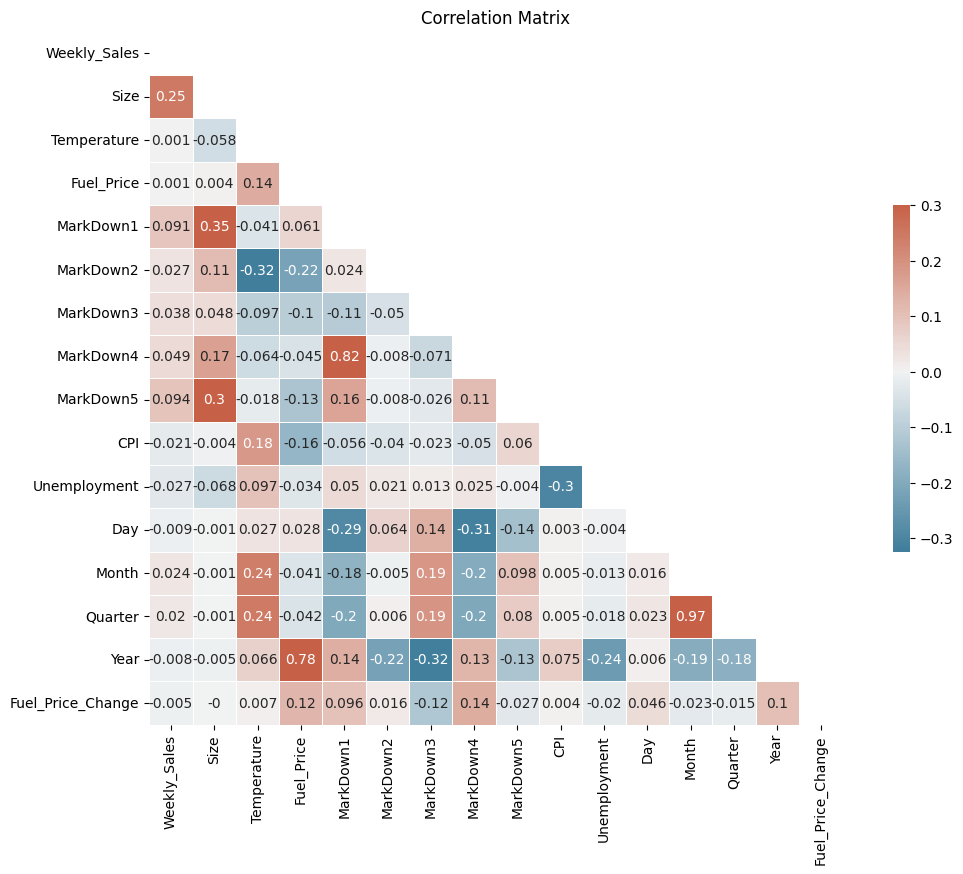

In [ ]:
# Numerical cols
num_cols = [x for x in pdf.columns if x not in ['Type','IsHoliday','Dept','Store']]

# Compute the correlation matrix
corr = pdf[num_cols].corr().round(3)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix')
plt.show()


In [ ]:
#Preprocssing data
!pip install xgboost

In [ ]:
#Joining the dataset and creating features

from pyspark.sql.functions import when, col

df = spark.read.options(delimeter=',', inferSchema=True, header=True).csv('/content/drive/MyDrive/content/drive/MyDrive/IDS561/train.csv')
stores = spark.read.options(delimeter=',', inferSchema=True, header=True).csv('/content/drive/MyDrive/content/drive/MyDrive/IDS561/stores.csv')
features = spark.read.options(delimeter=',', inferSchema=True, header=True).csv('/content/drive/MyDrive/content/drive/MyDrive/IDS561/features.csv')
# Converting 'NA' strings in MarkDown columns to null values
for i in range(1, 6):
    features = features.withColumn(f'MarkDown{i}', when(col(f'MarkDown{i}')=='NA', None).otherwise(col(f'MarkDown{i}')).cast('float'))

# Joining DataFrames
pdf = df.join(stores, on='Store', how='inner').join(features.drop('IsHoliday'), on=['Date', 'Store'], how='left').toPandas()

# Further processing with pandas
pdf['Date'] = pd.to_datetime(pdf['Date'])
pdf.set_index('Date', inplace=True)
pdf["CPI"] = pd.to_numeric(pdf["CPI"], downcast="float")
pdf["Unemployment"] = pd.to_numeric(pdf["Unemployment"], downcast="float")
pdf['Day'] = pdf.index.day
pdf['Week'] = np.ceil(pdf.index.dayofyear / 7).astype(int)
pdf['Month'] = pdf.index.month
pdf['Quarter'] = pdf.index.quarter
pdf['Year'] = pdf.index.year
pdf = pdf.query('Weekly_Sales >= 0 and Weekly_Sales < 200000')

# Display the first few rows
pdf.head().style.hide(axis='index')

Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Day,Week,Month,Quarter,Year
1,1,24924.500000,False,A,151315,42.310000,2.572000,nan,nan,nan,nan,nan,211.096359,8.106000,5,6,2,1,2010
1,1,46039.490000,True,A,151315,38.510000,2.548000,nan,nan,nan,nan,nan,211.242172,8.106000,12,7,2,1,2010
1,1,41595.550000,False,A,151315,39.930000,2.514000,nan,nan,nan,nan,nan,211.289139,8.106000,19,8,2,1,2010
1,1,19403.540000,False,A,151315,46.630000,2.561000,nan,nan,nan,nan,nan,211.319641,8.106000,26,9,2,1,2010
1,1,21827.900000,False,A,151315,46.500000,2.625000,nan,nan,nan,nan,nan,211.350143,8.106000,5,10,3,1,2010


In [ ]:
pdf.isnull().sum()

Store                0
Dept                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       269992
MarkDown2       309270
MarkDown3       283525
MarkDown4       285656
MarkDown5       269244
CPI                  0
Unemployment         0
Day                  0
Week                 0
Month                0
Quarter              0
Year                 0
dtype: int64

In [ ]:
pdf.fillna(0, inplace=True)

In [ ]:
#Converting String / Boolean Columns into Numerical
#Converting "Is Holiday" column to int
#Changing the type will replace True -> 1 and False -> 0

pdf['IsHoliday'] = pdf['IsHoliday'].astype('int')

In [ ]:
# Converting Type of store into numerical
# We will use the order of size to decide the numerical values for store types
# As we have seen Type A stores are largest and C are smallest,
# we will use the following mapping
# C-> 0, B-> 1, A-> 2

pdf['Type'] = pdf['Type'].replace({'C': 0, 'B': 1, 'A': 2})

In [ ]:
#XG Boost

TARGET = ['Weekly_Sales']
FEATURES = [i for i in pdf.columns if i not in TARGET]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pdf[FEATURES], pdf[TARGET],
                                                   test_size=0.2, random_state=130)

In [ ]:
import xgboost as xgb
reg = xgb.XGBRegressor(n_estimators=2000, early_stopping_rounds=50,
                      learning_rate=0.5)
model = reg.fit(X_train, y_train,
       eval_set=[(X_train, y_train), (X_test, y_test)],
       verbose=100)

[0]	validation_0-rmse:15063.79170	validation_1-rmse:15139.93328
[100]	validation_0-rmse:4242.24583	validation_1-rmse:4492.70623
[200]	validation_0-rmse:3482.17459	validation_1-rmse:3878.64994
[300]	validation_0-rmse:3087.08542	validation_1-rmse:3587.85615
[400]	validation_0-rmse:2811.11912	validation_1-rmse:3408.92916
[500]	validation_0-rmse:2608.76790	validation_1-rmse:3287.69013
[600]	validation_0-rmse:2453.39392	validation_1-rmse:3205.62576
[700]	validation_0-rmse:2334.43202	validation_1-rmse:3135.30009
[800]	validation_0-rmse:2237.46742	validation_1-rmse:3089.50207
[900]	validation_0-rmse:2146.26464	validation_1-rmse:3049.58338
[1000]	validation_0-rmse:2069.41808	validation_1-rmse:3019.87896
[1100]	validation_0-rmse:2000.64612	validation_1-rmse:2989.92329
[1200]	validation_0-rmse:1937.12835	validation_1-rmse:2962.81252
[1300]	validation_0-rmse:1882.34812	validation_1-rmse:2942.05732
[1400]	validation_0-rmse:1837.24162	validation_1-rmse:2926.77431
[1500]	validation_0-rmse:1783.89858

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
from sklearn import metrics
import numpy as np

xgboost_accuracy = reg.score(X_test,y_test)*100
print("XGB Regressor Evaluation Metrics: ")
print("Accuracy", round(xgboost_accuracy,3))
print("MAE \t" , round(metrics.mean_absolute_error(y_test, y_pred),3))
print("MSE \t" , round(metrics.mean_squared_error(y_test, y_pred),3))
print("RMSE \t" , round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
print("R2 \t" , round(metrics.explained_variance_score(y_test, y_pred),5))

XGB Regressor Evaluation Metrics: 
Accuracy 98.348
MAE 	 1570.744
MSE 	 8134464.931
RMSE 	 2852.098
R2 	 0.98348


In [ ]:
print('Top 10 features with their Feature importance scores: ')
pd.DataFrame(data=reg.feature_importances_,
            index=reg.feature_names_in_,
            columns=['Feature Importance']).sort_values('Feature Importance', ascending=False).head(10)

Top 10 features with their Feature importance scores: 


,Feature Importance
Size,0.349576
Dept,0.214630
Type,0.146933
Store,0.098718
CPI,0.038189
Week,0.030618
IsHoliday,0.024891
Month,0.023361
Year,0.019829
Unemployment,0.011220


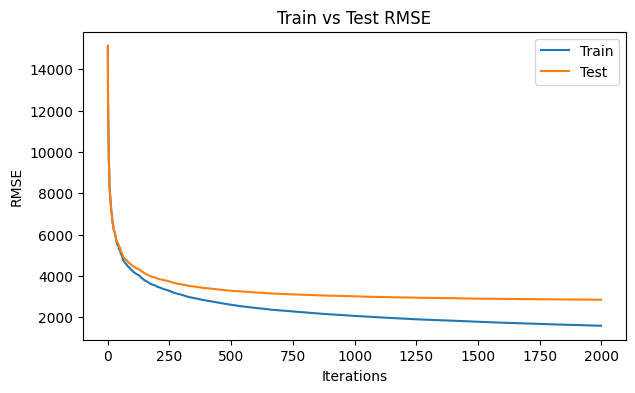

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(7,4))
score_hist = pd.DataFrame({'Train_rmse':model.evals_result()['validation_0']['rmse'], 'Test_rmse':model.evals_result()['validation_1']['rmse']})
sns.lineplot(score_hist['Train_rmse'], ax=ax, label='Train')
sns.lineplot(score_hist['Test_rmse'], ax=ax, label='Test')
plt.ylabel('RMSE')
plt.xlabel('Iterations')
plt.title('Train vs Test RMSE')
plt.show()

In [ ]:
val = pdf.loc[pdf.index >= '2012-05-01']
X_val, y_val = val[FEATURES], val[TARGET]
val['prediction'] = reg.predict(X_val)

<ipython-input-65-315f3b7bbeb8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['prediction'] = reg.predict(X_val)


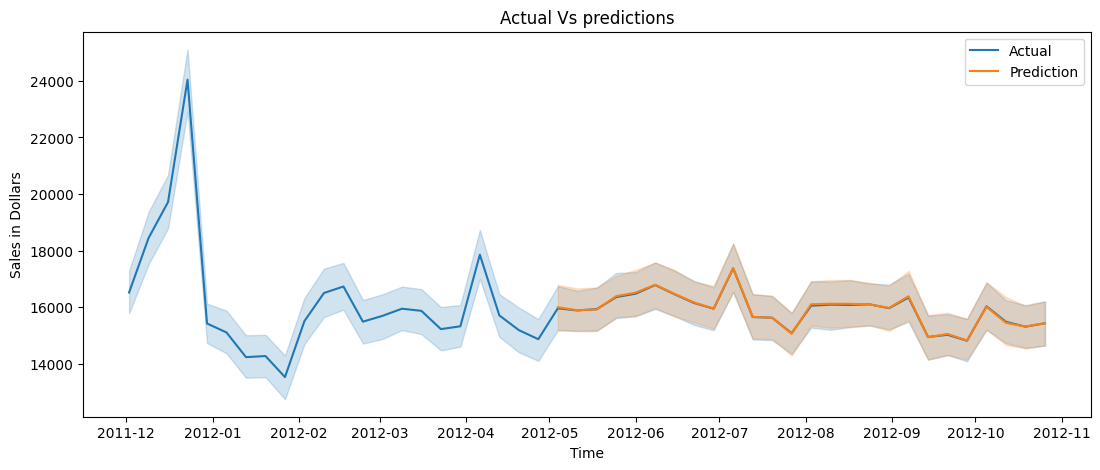

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(13,5))
sns.lineplot(pdf['Weekly_Sales'].loc[pdf.index>'2011-12-01'], ax=ax, label='Actual')
sns.lineplot(val['prediction'], ax=ax, label='Prediction')
plt.ylabel('Sales in Dollars')
plt.xlabel('Time')
plt.title('Actual Vs predictions')
plt.show()


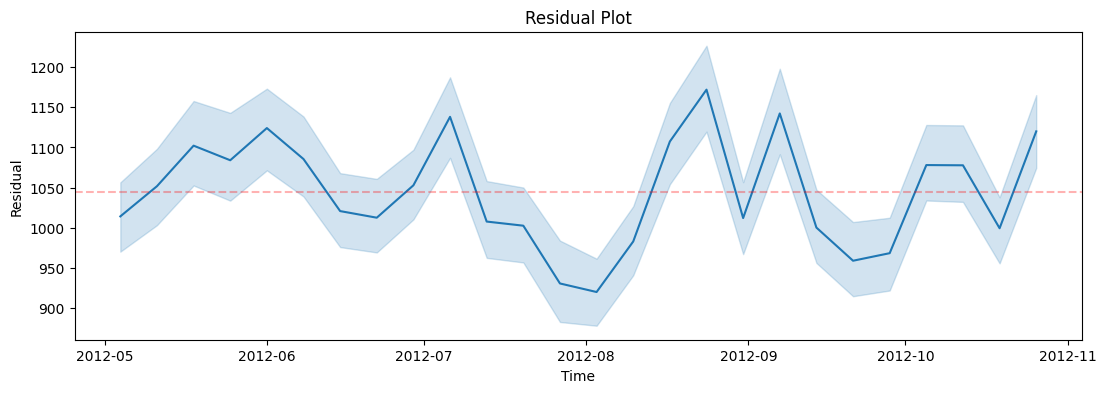

In [ ]:
val = val.assign(Residual= abs(val['Weekly_Sales'] - val['prediction']))
fig, ax = plt.subplots(1,1,figsize=(13,4))
#sns.lineplot(pdf['Weekly_Sales'].loc[pdf.index>'2011-12-01'], ax=ax, label='Actual')
sns.lineplot(val['Residual'], ax=ax)
plt.axhline(val['Residual'].mean(), linestyle='--', color='r', alpha=0.3)
#plt.ylabel('Sales in Dollars')
plt.xlabel('Time')
plt.title('Residual Plot')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
randomForest = RandomForestRegressor(n_estimators=30)
randomForest.fit(X_train, y_train)
randomForest_predict = randomForest.predict(X_test)

rf_accuracy = randomForest.score(X_test,y_test)*100
print("Random Forest Evaluation Metrics: ")
print("Accuracy", round(rf_accuracy,3))
print("MAE \t" , round(metrics.mean_absolute_error(y_test, randomForest_predict),3))
print("MSE \t" , round(metrics.mean_squared_error(y_test, randomForest_predict),3))
print("RMSE \t" , round(np.sqrt(metrics.mean_squared_error(y_test, randomForest_predict)),3))
print("R2 \t" , round(metrics.explained_variance_score(y_test, randomForest_predict),5))


<ipython-input-74-3af473820916>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest.fit(X_train, y_train)


Random Forest Evaluation Metrics: 
Accuracy 98.021
MAE 	 1336.029
MSE 	 9745770.756
RMSE 	 3121.822
R2 	 0.98021


In [ ]:
# Performing GridSearchCV on Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

depth = list(range(3,11))
param_grid = dict(max_depth = depth)
tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 10)
tree.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]})

In [ ]:
# Predicting train and test results
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

dt_accuracy = tree.score(X_test,y_test)*100
print("Accuracy", dt_accuracy)
print("Train Results for Decision Tree Regressor Model:")
print("Root Mean squared Error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-Squared: ", r2_score(y_train.values, y_train_pred))

print("Test Results for Decision Tree Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_test, y_test_pred)))
print("R-Squared: ", r2_score(y_test, y_test_pred))


# print("Decision Tree Evaluation Metrics: ")
# print("Accuracy", round(dt_accuracy,3))
# print("MAE \t" , round(metrics.mean_absolute_error(y_test, randomForest_predict),3))
# print("MSE \t" , round(metrics.mean_squared_error(y_test, randomForest_predict),3))
# print("RMSE \t" , round(np.sqrt(metrics.mean_squared_error(y_test, randomForest_predict)),3))
# print("R2 \t" , round(metrics.explained_variance_score(y_test, randomForest_predict),5))

Accuracy 87.81936258491231
Train Results for Decision Tree Regressor Model:
Root Mean squared Error:  7662.26261676269
R-Squared:  0.8800314587484894
Test Results for Decision Tree Regressor Model:
Root Mean Squared Error:  7744.6002779157425
R-Squared:  0.8781936258491231
